In [2]:
from imutils import contours
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

tem_path = os.curdir + os.sep + 'data' + os.sep + 'tem.png'
che_path = os.curdir + os.sep + 'data' + os.sep + 'check.png'

In [3]:
def cv_show(name, show_img):
    cv2.imshow(name, show_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
def plt_show(name, show_img):
    plt.imshow(show_img, plt.cm.gray)
    plt.title(name)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.show()

In [4]:
# cnts的第一個對應到bounding_boxes的第一個
# 将对象中对应的元素打包成一个个元组，排序看使用x軸或者y軸的值
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0

    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # 計算外接矩形 boundingBoxes是一個元組
    # 用一個最小的矩形，把找到的形狀包起來x,y,h,w
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    # sorted排序
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))

    # 輪廓和boundingBoxess
    return cnts, boundingBoxes

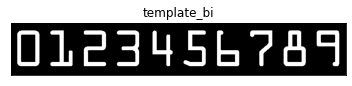

In [5]:
# 模板處理
img = cv2.imread(tem_path)
# cv_show('template', img)

ref = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv_show('template_gray', ref)

# 模板處理-二值影象 thresh, maxval，return thresh和處理後的像素資料，取像素資料
ref = cv2.threshold(ref, 10, 255, cv2.THRESH_BINARY_INV)[1]
# cv_show('template_bi', ref)
plt_show('template_bi', ref)

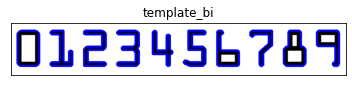

In [7]:
# 模板處理-計算輪廓
# cv2.findContours()函式接受的引數為二值圖，即黑白的（不是灰度圖）
# cv2.RETR_EXTERNAL只檢測外輪廓
# cv2.CHAIN_APPROX_SIMPLE只保留終點座標
# 返回的ref_cnts，list中每個元素都是影象中的一個輪廓(存放著每一個輪廓的點位(顶点或者转折点))
refCnts, hierarchy = cv2.findContours(ref.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 輪廓在二值圖上得到, 畫要畫在原圖上
# # 第三个参数指定绘制轮廓list中的哪条轮廓，如果是-1，
# 则绘制其中的所有轮廓。后面的参数很简单
# 剩餘的引數是顏色(0 B, 0 G, 255 R)、厚度
cv2.drawContours(img, refCnts, -1, (0, 0, 255), 3)
# cv_show('template_Contours', img)
plt_show('template_bi', img)

# refCnts，應該有10個
# print(np.array(refCnts).shape)

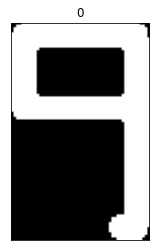

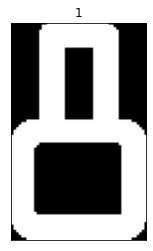

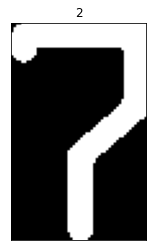

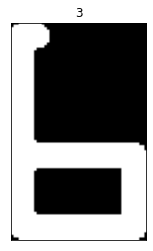

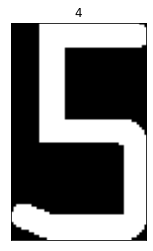

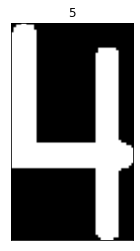

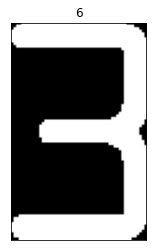

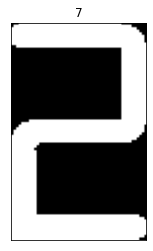

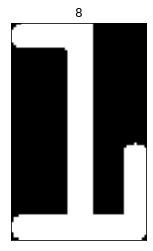

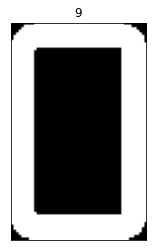

In [12]:
# 模板處理-排序
# 看一下排序前
for (i, c) in enumerate(refCnts):
#     print(np.array(c).shape)
#     print('====================')
    (x, y, w, h) = cv2.boundingRect(c)
    # 取出圖
    roi = ref[y:y + h, x:x + w]
    # roi = cv2.resize(roi, (57, 88))
    plt_show(str(i), roi)

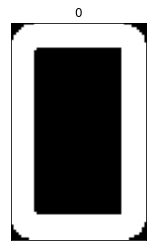

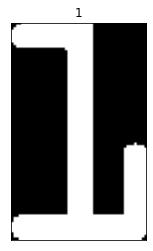

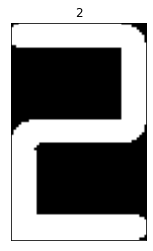

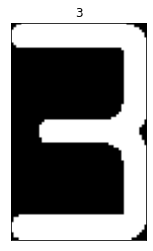

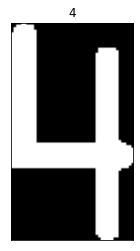

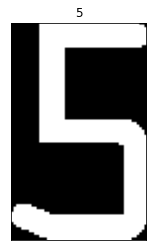

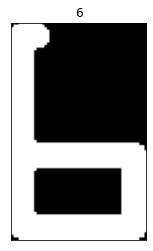

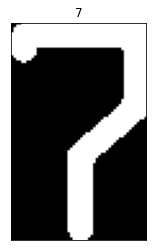

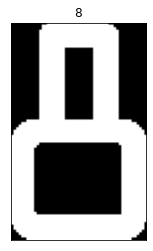

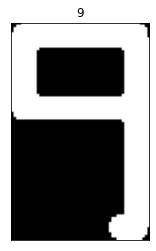

In [14]:
ref_cnts = sort_contours(refCnts, method="left-to-right")[0]

# 看一下排序後
for (i, c) in enumerate(ref_cnts):
    (x, y, w, h) = cv2.boundingRect(c)
    # 取出圖
    roi = ref[y:y + h, x:x + w]
    # roi = cv2.resize(roi, (57, 88))
    plt_show(str(i), roi)